In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('datasets/index2018.csv')

## checkpointing

In [3]:
data=df.copy()


data.date=pd.to_datetime(data.date,dayfirst=True)

data.head()

data.set_index(data.date,inplace=True)

del data['date']

### checkpointing for using only data for spx

In [4]:
spx_price=data.spx.copy()
ftse_price=data.ftse.copy()

## Setting the desired frequency 

In [5]:
spx_price=spx_price.asfreq('b')
spx_price.isna().sum()

8

In [6]:
ftse_price=spx_price.asfreq('b')
ftse_price.isna().sum()

8

## Filling the missing values

In [7]:
spx_price=spx_price.fillna(method='ffill')
spx_price.isna().sum()

0

In [8]:
ftse_price=spx_price.fillna(method='ffill')
ftse_price.isna().sum()

0

## Returns of SPX Price

In [9]:
spx_returns=spx_price.pct_change(1)*100

In [10]:
spx_returns=spx_returns.dropna()

## Squared Returns of SPX Price

In [11]:
spx_squared_returns=spx_returns.mul(spx_returns)

## Plotting returns

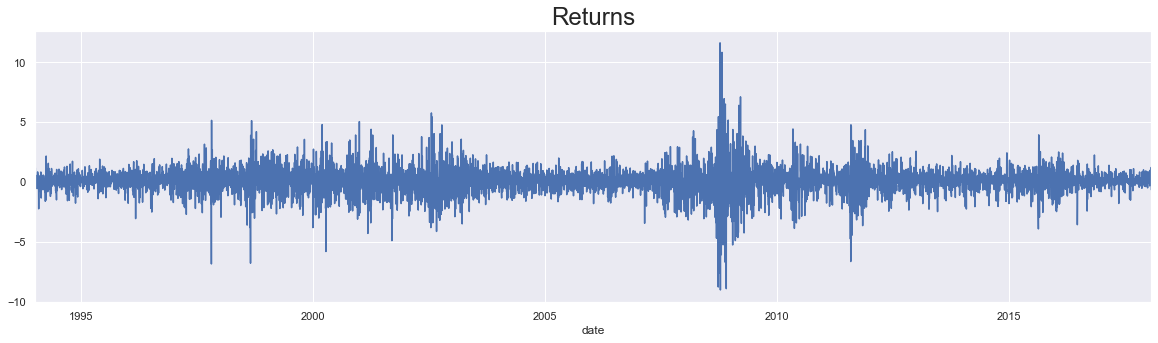

In [12]:
spx_returns.plot(figsize=(20,5))
plt.title("Returns" ,size=24)
plt.show()

## Plotting Squared Returns(VOLATILITY)

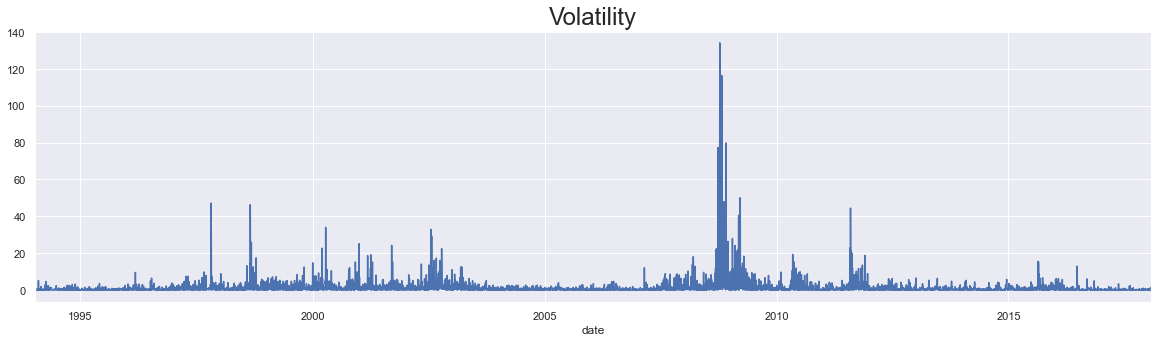

In [13]:
spx_squared_returns.plot(figsize=(20,5))
plt.title("Volatility",size=24)
plt.show()

## PACF 

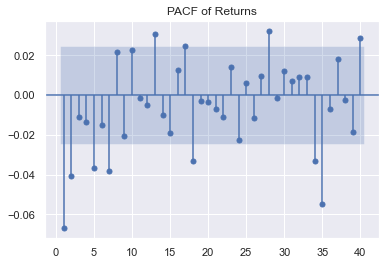

In [14]:
sgt.plot_pacf(spx_returns,lags=40,zero=False)
plt.title("PACF of Returns")
plt.show()

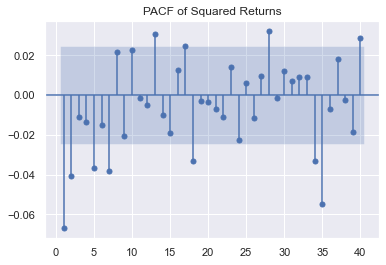

In [15]:
sgt.plot_pacf(spx_returns,lags=40,zero=False)
plt.title("PACF of Squared Returns")
plt.show()

## ARCH model

In [16]:
#importing necessary module
from arch import arch_model

In [17]:
model_arch_1=arch_model(spx_returns)
result_arch_1=model_arch_1.fit()
result_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 532507680480354.25
Iteration:      2,   Func. Count:     15,   Neg. LLF: 252893992.5610535
Iteration:      3,   Func. Count:     23,   Neg. LLF: 8393.760782068994
Iteration:      4,   Func. Count:     29,   Neg. LLF: 8366.164328677864
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8457.52465554033
Iteration:      6,   Func. Count:     41,   Neg. LLF: 8311.082749630885
Iteration:      7,   Func. Count:     47,   Neg. LLF: 8324.596101331897
Iteration:      8,   Func. Count:     54,   Neg. LLF: 8298.311230086609
Iteration:      9,   Func. Count:     60,   Neg. LLF: 8296.806269509863
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8296.801979722537
Iteration:     11,   Func. Count:     70,   Neg. LLF: 8296.801900804554
Iteration:     12,   Func. Count:     75,   Neg. LLF: 8296.801839809983
Iteration:     13,   Func. Count:     79,   Neg. LLF: 8296.801839810247
Optimization terminated successfully    (Exit mode 0)
          

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8296.80
Distribution:                  Normal   AIC:                           16601.6
Method:            Maximum Likelihood   BIC:                           16628.6
                                        No. Observations:                 6276
Date:                Thu, May 27 2021   Df Residuals:                     6275
Time:                        11:20:38   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0628  9.830e-03      6.386  1.704e-10 [4.351e-02,8.204e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0119  3.320e-03      3.578  3.460e-04 [5.372e-03,1.839e-02]
alpha[1]       0.0846  1.185e-02      7.134  9.725e-13   [6.133e-02,  0.108]
beta[1]        0.9059  1.274e-02     71.098      0.000     [  0.881,  0.931]
============================================================================

Covariance estimator: robust
"""

## The Simple ARCH(1)

In [18]:
model_arch_1=arch_model(spx_returns,mean="constant",vol="ARCH",p=1)
result_arch_1=model_arch_1.fit()
result_arch_1.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 39001.615063240824
Iteration:      2,   Func. Count:     13,   Neg. LLF: 14514.508528760198
Iteration:      3,   Func. Count:     20,   Neg. LLF: 9580.704940716823
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9353.687485305625
Iteration:      5,   Func. Count:     30,   Neg. LLF: 9353.687482026548
Iteration:      6,   Func. Count:     33,   Neg. LLF: 9353.687482026553
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9353.687482026548
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9353.69
Distribution:                  Normal   AIC:                           18713.4
Method:            Maximum Likelihood   BIC:                           18733.6
                                        No. Observations:                 6276
Date:                Thu, May 27 2021   Df Residuals:                     6275
Time:                        11:20:38   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0531  1.521e-02      3.490  4.823e-04 [2.328e-02,8.291e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9070  4.512e-02     20.104  6.870e-90 [  0.819,  0.995]
alpha[1]       0.3119  4.933e-02      6.323  2.564e-10 [  0.215,  0.409]
========================================================================

Covariance estimator: robust
"""

## Higher lag ARCH model

In [19]:
model_arch_1=arch_model(spx_returns,mean="constant",vol="ARCH",p=2)
result_arch_1=model_arch_1.fit(update_freq=5)
result_arch_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 9253.508803049966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8959.93270312353
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8959.93
Distribution:                  Normal   AIC:                           17927.9
Method:            Maximum Likelihood   BIC:                           17954.8
                                        No. Observations:                 6276
Date:                Thu, May 27 2021   Df Residuals:                     6275
Time:                        11:20:38   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0654  1.303e-02      5.019  5.188e-07 [3.986e-02,9.094e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6192  3.389e-02     18.272  1.385e-74 [  0.553,  0.686]
alpha[1]       0.1980  3.069e-02      6.454  1.092e-10 [  0.138,  0.258]
alpha[2]       0.3285  3.913e-02      8.394  4.680e-17 [  0.252,  0.405]
========================================================================

Covariance estimator: robust
"""

In [20]:
result_arch={}
log_liklihood=[]
i=1
while True:
    key="result_arch_"+str(i)
    model=arch_model(spx_returns,mean="constant",vol="ARCH",p=int(i))
    result=model.fit(update_freq=5)
    result_arch[key]={result.loglikelihood,result.aic,result.bic}
    if i==1:
        log_liklihood.append(result.loglikelihood)
    elif sum(result.loglikelihood < np.array(log_liklihood)) > 0:
        log_liklihood.append(result.loglikelihood)
        break
    else:
        log_liklihood.append(result.loglikelihood)
    i=i+1
    print(i)
        

Iteration:      5,   Func. Count:     30,   Neg. LLF: 9353.687482026548
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9353.687482026548
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
2
Iteration:      5,   Func. Count:     34,   Neg. LLF: 9253.508803049966
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8959.93270312353
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
3
Iteration:      5,   Func. Count:     39,   Neg. LLF: 9247.491141176004
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8773.085048941579
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8773.085031226474
            Iterations: 12
            Function evaluations: 85
            Gradient evaluations: 12
4
Iteration:      5,   Func. Count:     45,   Neg. LLF: 9110.780618881861
Iteration:  

Iteration:     10,   Func. Count:    229,   Neg. LLF: 9225.165537823756
Iteration:     15,   Func. Count:    341,   Neg. LLF: 9490.75852934905
Iteration:     20,   Func. Count:    455,   Neg. LLF: 8569.00142165264
Iteration:     25,   Func. Count:    570,   Neg. LLF: 8366.511385801248
Iteration:     30,   Func. Count:    684,   Neg. LLF: 8312.969468794669
Iteration:     35,   Func. Count:    797,   Neg. LLF: 8293.726083618225
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8293.716923974473
            Iterations: 39
            Function evaluations: 880
            Gradient evaluations: 39
19
Iteration:      5,   Func. Count:    123,   Neg. LLF: 9322.641249832763
Iteration:     10,   Func. Count:    241,   Neg. LLF: 19935.892622648404
Iteration:     15,   Func. Count:    358,   Neg. LLF: 8890.396311149436
Iteration:     20,   Func. Count:    477,   Neg. LLF: 8878.445404194183
Iteration:     25,   Func. Count:    597,   Neg. LLF: 8623.141588479

Iteration:      5,   Func. Count:    167,   Neg. LLF: 10041.605407373136
Iteration:     10,   Func. Count:    328,   Neg. LLF: 14494.336850843221
Iteration:     15,   Func. Count:    490,   Neg. LLF: 9577.602194502926
Iteration:     20,   Func. Count:    655,   Neg. LLF: 9014.55780909414
Iteration:     25,   Func. Count:    819,   Neg. LLF: 8666.632947956496
Iteration:     30,   Func. Count:    984,   Neg. LLF: 8353.975921846173
Iteration:     35,   Func. Count: 1.15e+03,   Neg. LLF: 8309.099674629231
Iteration:     40,   Func. Count: 1.31e+03,   Neg. LLF: 8299.178969863482
Iteration:     45,   Func. Count: 1.48e+03,   Neg. LLF: 8290.032420347557
Iteration:     50,   Func. Count: 1.64e+03,   Neg. LLF: 8280.813812679513
Iteration:     55,   Func. Count: 1.8e+03,   Neg. LLF: 8280.802761187297
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8280.80275866434
            Iterations: 57
            Function evaluations: 1857
            Gradient eval

In [21]:
result_arch

{'result_arch_1': {-9353.687482026548, 18713.374964053095, 18733.608428394655},
 'result_arch_2': {-8959.93270312353, 17927.86540624706, 17954.84335870247},
 'result_arch_3': {-8773.085031226474, 17556.170062452948, 17589.892503022213},
 'result_arch_4': {-8615.498943708008, 17242.997887416015, 17283.46481609913},
 'result_arch_5': {-8500.866132606334, 17015.732265212668, 17062.943682009638},
 'result_arch_6': {-8444.913347133275, 16905.82669426655, 16959.782599177375},
 'result_arch_7': {-8389.80242087095, 16797.6048417419, 16858.305234766576},
 'result_arch_8': {-8366.251609800203, 16752.503219600407, 16819.948100738937},
 'result_arch_9': {-8342.171543466064, 16706.343086932127, 16780.53245618451},
 'result_arch_10': {-8316.278032748278, 16656.556065496556, 16737.48992286279},
 'result_arch_11': {-8311.643294104568,
  16649.286588209136,
  16736.964933689225},
 'result_arch_12': {-8306.967045263002,
  16641.934090526003,
  16736.356924119944},
 'result_arch_13': {-8301.90908736669, 

In [22]:
model_arch_30=arch_model(spx_returns,mean="constant",vol="ARCH",p=30)
result_arch_30=model_arch_30.fit(update_freq=5)
result_arch_30.summary()

Iteration:      5,   Func. Count:    177,   Neg. LLF: 8986.138837208924
Iteration:     10,   Func. Count:    349,   Neg. LLF: 9021.718728222517
Iteration:     15,   Func. Count:    521,   Neg. LLF: 9329.057298878924
Iteration:     20,   Func. Count:    694,   Neg. LLF: 9030.232389200297
Iteration:     25,   Func. Count:    869,   Neg. LLF: 8755.521741284281
Iteration:     30,   Func. Count: 1.05e+03,   Neg. LLF: 8311.887518860312
Iteration:     35,   Func. Count: 1.22e+03,   Neg. LLF: 8319.873054367708
Iteration:     40,   Func. Count: 1.4e+03,   Neg. LLF: 8292.812775346265
Iteration:     45,   Func. Count: 1.57e+03,   Neg. LLF: 8282.351052254638
Iteration:     50,   Func. Count: 1.74e+03,   Neg. LLF: 8277.7711117659
Iteration:     55,   Func. Count: 1.91e+03,   Neg. LLF: 8275.622235997485
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8275.622076030631
            Iterations: 58
            Function evaluations: 2008
            Gradient eval

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                    spx   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8275.62
Distribution:                  Normal   AIC:                           16615.2
Method:            Maximum Likelihood   BIC:                           16831.1
                                        No. Observations:                 6276
Date:                Thu, May 27 2021   Df Residuals:                     6275
Time:                        11:21:03   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0624  1.017e-02      6.140  8.264e-10 [4.250e-02,8.237e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1337  2.178e-02      6.138  8.331e-10    [9.103e-02,  0.176]
alpha[1]       0.0502  1.570e-02      3.196  1.392e-03  [1.941e-02,8.097e-02]
alpha[2]       0.1287  2.194e-02      5.868  4.415e-09    [8.573e-02,  0.172]
alpha[3]       0.0648  1.584e-02      4.089  4.340e-05  [3.371e-02,9.580e-02]
alpha[4]       0.0749  1.859e-02      4.032  5.537e-05    [3.851e-02,  0.111]
alpha[5]       0.0591  1.676e-02      3.528  4.183e-04  [2.628e-02,9.198e-02]
alpha[6]       0.0410  1.456e-02      2.814  4.900e-03  [1.243e-02,6.951e-02]
alpha[7]       0.0854  2.352e-02      3.632  2.813e-04    [3.932e-02,  0.132]
alpha[8]       0.0272  1.802e-02      1.511      0.131 [-8.094e-03,6.256e-02]
alpha[9]       0.0695  2.028e-02      3.427  6.114e-04    [2.974e-02,  0.109]
alpha[10]      0.0662  1.972e-02      3.356  7.906e-04    [2.753e-02,  0.105]
alpha[11]      0.0102  1.526e-02      0.668      0.504 [-1.971e-02,4.010e-02]
alpha[12]      0.0190  1.591e-02      1.194      0.233 [-1.219e-02,5.018e-02]
alpha[13]      0.0235  1.505e-02      1.561      0.119 [-6.004e-03,5.299e-02]
alpha[14]      0.0155  1.336e-02      1.158      0.247 [-1.072e-02,4.166e-02]
alpha[15]      0.0000  1.387e-02      0.000      1.000 [-2.718e-02,2.718e-02]
alpha[16]  8.2743e-03  1.602e-02      0.516      0.606 [-2.313e-02,3.968e-02]
alpha[17]      0.0133  1.503e-02      0.888      0.375 [-1.612e-02,4.281e-02]
alpha[18]      0.0162  1.359e-02      1.189      0.235 [-1.048e-02,4.280e-02]
alpha[19]      0.0107  1.514e-02      0.705      0.481 [-1.900e-02,4.035e-02]
alpha[20]  8.1775e-03  1.285e-02      0.636      0.524 [-1.701e-02,3.336e-02]
alpha[21]      0.0139  1.332e-02      1.040      0.298 [-1.225e-02,3.996e-02]
alpha[22]      0.0111  1.275e-02      0.870      0.384 [-1.389e-02,3.608e-02]
alpha[23]      0.0173  1.555e-02      1.112      0.266 [-1.318e-02,4.778e-02]
alpha[24]  1.9102e-03  1.425e-02      0.134      0.893 [-2.602e-02,2.984e-02]
alpha[25]  8.1681e-03  1.354e-02      0.603      0.546 [-1.837e-02,3.471e-02]
alpha[26]      0.0000  1.423e-02      0.000      1.000 [-2.789e-02,2.789e-02]
alpha[27]  5.4220e-03  9.575e-03      0.566      0.571 [-1.334e-02,2.419e-02]
alpha[28]  5.7404e-03  1.339e-02      0.429      0.668 [-2.051e-02,3.199e-02]
alpha[29]      0.0100  1.563e-02      0.643      0.520 [-2.058e-02,4.067e-02]
alpha[30]      0.0338  1.662e-02      2.032  4.217e-02  [1.195e-03,6.632e-02]
===============================================